# Tracking EPA's COVID-19 non-enforcement policy
In late March 2020, EPA released a memo announcing that it would not penalize regulated industries that fail to meet their monitoring and reporting requirements due to COVID-19. Specifically EPA has said that it:

> "is not seeking penalties for noncompliance only in circumstances that involve routine monitoring and reporting requirements, if, on a case-by-case basis, EPA agrees that such noncompliance was caused by the COVID-19 pandemic."

This may have a number of public and environmental health impacts if facilities respond by increasing their emissions and discharges. See our response to EPA's memo here: https://envirodatagov.org/epas-covid-19-leniency-is-a-free-pass-to-pollute/

What is the effect of EPA's non-enforcement of Clean Air Act and Clean Water Act permits? Using this notebook, you can track how facilities' releases - as well as monitoring and reporting - of air and water hazards has changed in your state over the past few months, compared to previous years. 

Essentially, there are three scenarios we may see playing out:

_Monitoring and reporting violations_
- 1. facilities that do not report (we can track this) but do still meet their permit limits (we can't know this, however, because they didn't report)
- 2. facilities that do *not* report (we can track this) and actually exceed their limits (but we can't know this, because they didn't report)

_Environmental violations_
- 3. facilities that do meet their reporting obligations BUT they report having exceeded their permitted limits

Organization of this notebook:
 - Nationwide trends
     - Air emissions (from major sources?)
     - Water discharges from major sources
     - Water quality monitoring and reporting violations
 - Local trends: zoom in on a state/zip of interest
     - Air emissions (from major sources?)
     - Water discharges from major sources
     - Water quality monitoring and reporting violations 
    
---

## Setup
Here we load some helper code to get us going.

In [1]:
# Import libraries
import urllib.parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import datetime
import folium

## Select your state
By typing in its postal code abbreviation

In [3]:
my_state="NH" # Could switch to dropdown menu

## National Trends

### Water pollutant discharges

In [8]:
sql = "select NPDES_ID, EXCEEDENCE_PCT, MONITORING_PERIOD_END_DATE, PARAMETER_DESC" + \
    " from NPDES_EFF_VIOLATIONS where MONITORING_PERIOD_END_DATE like '04/%'"
#NPDES_ID like '" + my_state + "%' and" +\
url='http://apps.tlt.stonybrook.edu/echoepa/?query='
data_location=url+urllib.parse.quote(sql)
#

data = pd.read_csv(data_location,encoding='iso-8859-1',header = 0)
data.set_index("NPDES_ID", inplace=True)
data

,EXCEEDENCE_PCT,MONITORING_PERIOD_END_DATE,PARAMETER_DESC
NPDES_ID,,,
WV1022024,NaN,04/30/2012,"Aluminum, total [as Al]"
WV1024221,NaN,04/30/2012,"Stream flow, instantaneous"
KY0089702,NaN,04/30/2011,pH
WV1025945,NaN,04/30/2012,pH
MO0104736,NaN,04/30/2011,"Arsenic, total recoverable"
LAG570266,NaN,04/30/2011,pH
KY0089702,NaN,04/30/2010,"Thallium, total recoverable"
WV1014595,NaN,04/30/2011,"Manganese, total [as Mn]"
WA0023345,NaN,04/30/2010,"Coliform, fecal general"


### Let's chart this
Are facilities exceeding their permits more this April than previous Aprils? We need to compare April-April because there is a seasonality to many discharges.

/Users/Eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


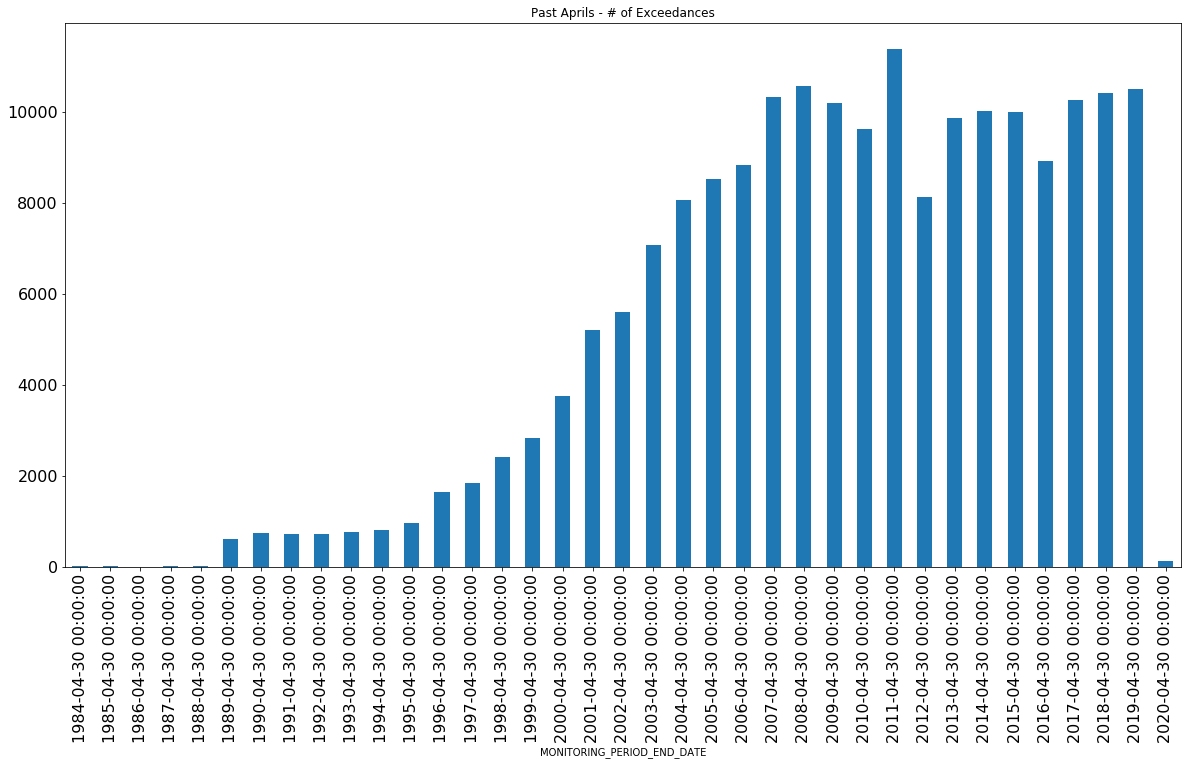

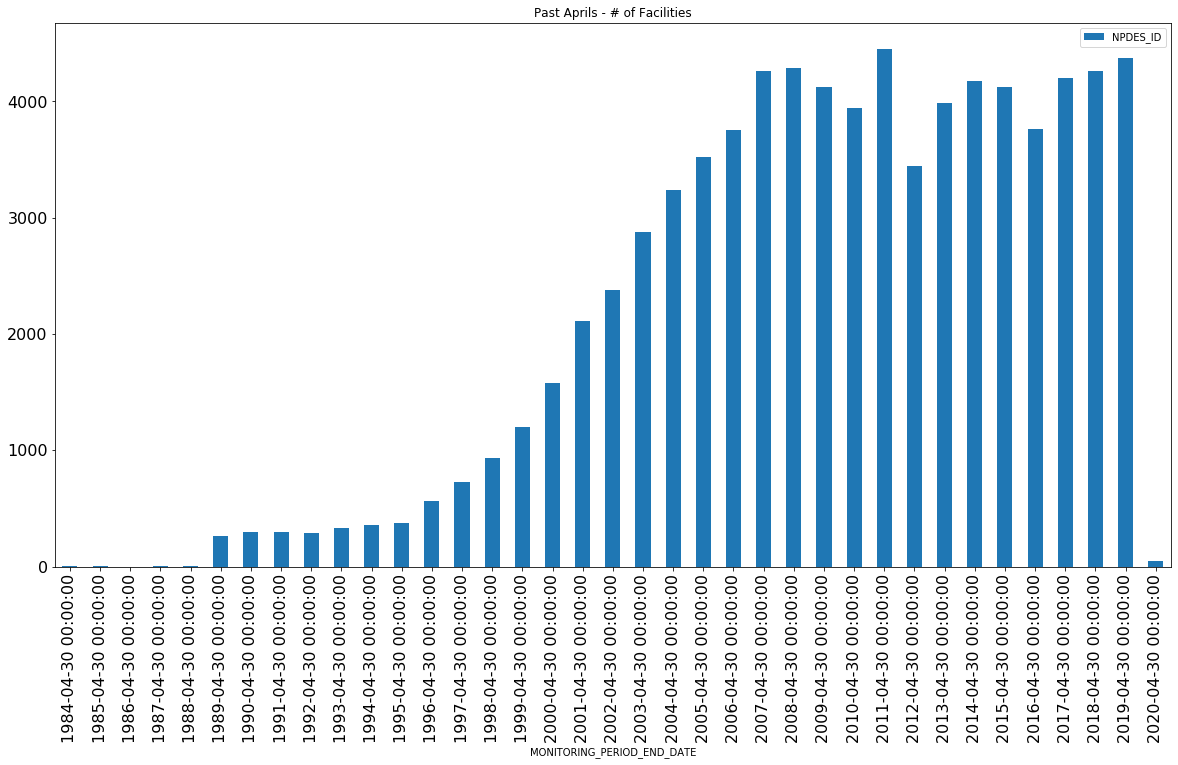

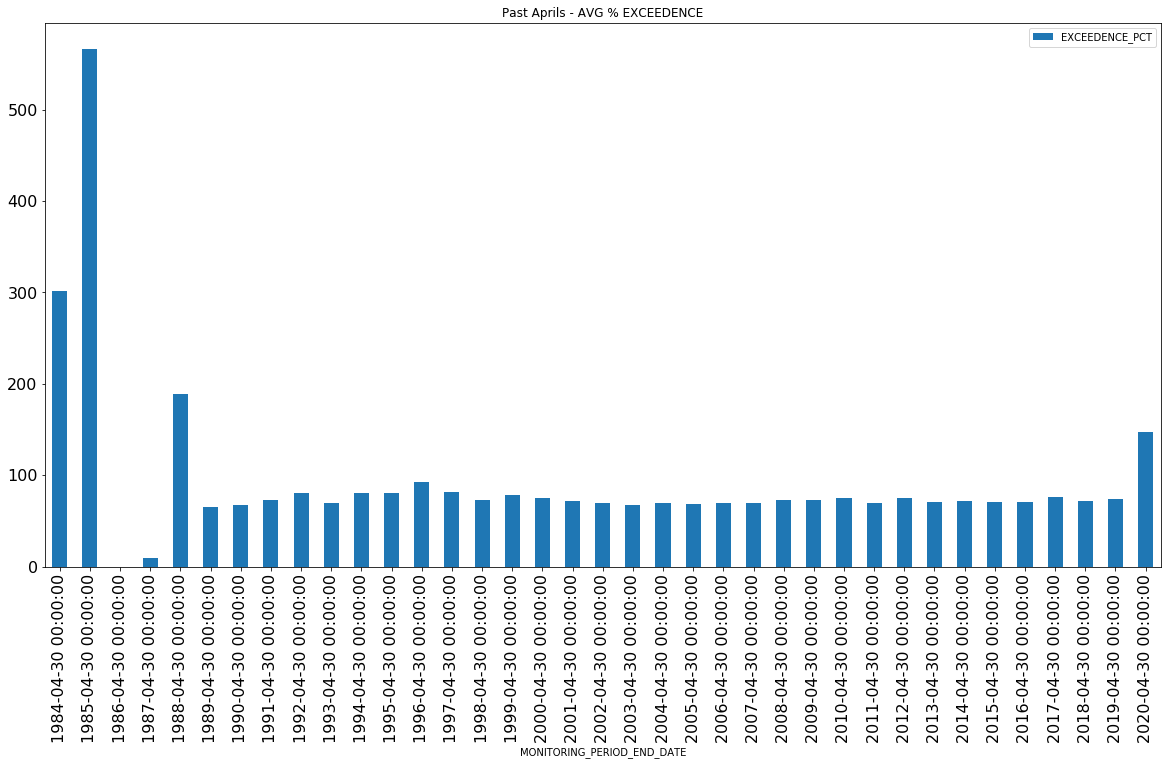

In [139]:
# First, # of exceedences
exceeds = data.loc[(data['EXCEEDENCE_PCT'] > 0),:] #filter to facilities with pollutant exceedences

exceeds['MONITORING_PERIOD_END_DATE'] = pd.to_datetime(exceeds['MONITORING_PERIOD_END_DATE'], format="%m/%d/%Y") #format

month = exceeds.groupby(['MONITORING_PERIOD_END_DATE'])['EXCEEDENCE_PCT'].count() # = total number of pollutants exceeded...# only need to keep one column. probably should rename...
month = month.resample('M').sum() #resample to a monthly basis and 
month = month.loc[(month.index.month == 4)] # Filter back to just Aprils

ax = month.plot(kind='bar', title = "Past Aprils - # of Exceedances", figsize=(20, 10), fontsize=16)
ax

# Second, # of facilities
fac=exceeds.reset_index()
fac=fac.set_index(['MONITORING_PERIOD_END_DATE'])
facilities = fac.groupby(['MONITORING_PERIOD_END_DATE']).agg({"NPDES_ID": "nunique"})
facilities = facilities.resample('M').sum()
facilities = facilities.loc[(facilities.index.month == 4)] # Filter back to just Aprils

ay = facilities.plot(kind='bar', title = "Past Aprils - # of Facilities Exceeding", figsize=(20, 10), fontsize=16)
ay

# Third, median % exceedance
med = exceeds.reset_index()
med = med.set_index(['MONITORING_PERIOD_END_DATE'])
med = med.resample("M").median()
med = med.loc[(med.index.month == 4)]
med

az = med.plot(kind='bar', title = "Past Aprils - MEDIAN % EXCEEDENCE", figsize=(20, 10), fontsize=16)
az

### Water Quality Monitoring and Reporting
First, we'll look at how facilities regulated under the Clean Water Act have altered their required monitoring practices.

Run the code in the cell below, which will query our copy of the ECHO database and pull information on regulated facilities in your state.

Specifically, we'll find records of facilities out of compliance - that is, violating their permits - due to "Non-Receipt of DMR/Schedule Report" DMR stands for Discharge Monitoring Reports, and are required by the CWA's National Pollutant Discharge Elimination System (NPDES). 

Not submitting these reports on schedule can lead to "Reportable Non-Compliance" with NPDES and CWA. According to the EPA, "DMR values not received within 31 days of the DMR form due date result in the generation of a violation code (D80 or D90). ICIS-NPDES identifies these DMR non-receipt violations and automatically creates violation codes for the missing DMR values with monitoring requirements (D80) and missing DMR values with effluent limits (D90). EPA's data sharing policy allows states a 40-day window to report DMR values to EPA's data system; therefore, DMR values reported on time to state agencies and shared with EPA within 40 days do not contribute to permit level noncompliance status."

In this case, "N" does NOT mean no - it just is a code for the kind of violation event we're interested in (non-reporting).

In [ ]:
sql = "select NPDES_ID, SCHEDULE_DATE, RNC_DETECTION_CODE" + \
    " from NPDES_PS_VIOLATIONS where RNC_DETECTION_CODE = 'N' and " \
    " NPDES_ID like '" + my_state + "%'"
url='http://apps.tlt.stonybrook.edu/echoepa/?query='
data_location=url+urllib.parse.quote(sql)
#

data = pd.read_csv(data_location,encoding='iso-8859-1',header = 0)
data.set_index("NPDES_ID", inplace=True)
data

### Let's organize this information by date
We're curious to track whether non-receipt of DMRs has increased due to COVID, so we have to be able to summarize and order facilities' violations across time.

In [ ]:
# The NPDES_IDS in ECHO_EXPORTER can contain multiple ids for a facility. 
data['SCHEDULE_DATE'] = pd.to_datetime(data['SCHEDULE_DATE'], format="%m/%d/%Y")
by_date = data.groupby('SCHEDULE_DATE')[['RNC_DETECTION_CODE']].count()
by_date=by_date.resample('M').sum() # Summarize by month. Or Y for year?
by_date=by_date.loc['2017-01-01':'2020-05-01'] #filter to relatively recent
by_date

### Plot this ^ !!!
It's all well and good to have this table, but it's hard to pick out patterns from tabular data. Let's plot it as what's called a histogram in order to see what's going on.

The height of each bar will indicate how many facilities were out of compliance due to missing or late reports, while the yellow line will show us the average number of these facilities for each of the past four Aprils and the red line indicates the average for each month over the past three years or so.

In [ ]:
chart_title = "Total CWA Non-Compliance due to Missing or Late Reports"
ax = by_date.plot(kind='bar', title = chart_title, figsize=(20, 10), legend=False, fontsize=16)
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

#label 3 year trendline
trend=by_date['RNC_DETECTION_CODE'].mean()
ax.axhline(y=trend, color='r', linestyle='-')

#label past 4 Aprils trend (2017, 2018, 2019, 2020)
trend_month=pd.concat([by_date.loc["2017-03"],by_date.loc["2018-03"],by_date.loc["2019-03"],by_date.loc["2020-03"]])
trend_month=trend_month['RNC_DETECTION_CODE'].mean()
ax.axhline(y=trend_month, color='y', linestyle='-')

### Which facilities didn't report in the month of April?
We don't have that information yet, but it'll be a good indicator of the impact of EPA's memo, which went into effect that month.

So, for now, let's map those that didn't report in March 2020.

First, let's get more information about those facilities.

In [ ]:
latest = data[(data["SCHEDULE_DATE"] >= '2020-03-01') & (data["SCHEDULE_DATE"] < '2020-04-01')] #filter to March

if (len(latest.index)>0):
    #get facility information from ECHO
    sql = "select FAC_NAME, NPDES_IDS, FAC_LAT, FAC_LONG, CWA_QTRS_WITH_NC" + \
        " from ECHO_EXPORTER " + \
        " where NPDES_FLAG = 'Y' and FAC_STATE = '" + my_state + "'"
    url='http://apps.tlt.stonybrook.edu/echoepa/?query='
    data_location=url+urllib.parse.quote(sql)
    echo_data = pd.read_csv(data_location,encoding='iso-8859-1',header = 0)
    echo_data.set_index( 'NPDES_IDS', inplace=True )

    #merge echo and npdes data
    latest = latest.join(echo_data)
    print(latest)
    
else:
    print("Actually, there were no reporting violations for March in "+my_state)
    

### Map them!
Now we'll map those facilities. The ones that have spent more quarters in non-compliance over the past three years will be displayed as larger.

In [ ]:
# Filter to remove NaNs - missing data!
latest = latest[~(np.isnan(latest["FAC_LAT"])) | ~(np.isnan(latest["FAC_LONG"]))]

# Generate a scale by which we can classify facilities by quarters in non-compliance, and map them accordingly
scale=pd.qcut(latest["CWA_QTRS_WITH_NC"], 4, labels=False) # quartiles
radii={0:6, 1:10, 2:14, 3: 20}

def mapper(df):
    # Initialize the map
    m = folium.Map(
        location = [df.mean()["FAC_LAT"], df.mean()["FAC_LONG"]],
        zoom_start = 8
    )

    # Add a clickable marker for each facility
    for index, row in df.iterrows():
        print(index, row.loc)
        folium.CircleMarker(
            location = [row["FAC_LAT"], row["FAC_LONG"]],
            popup = row["FAC_NAME"] + "\n Quarters in Non-Compliance over the past three years: "+str(row["CWA_QTRS_WITH_NC"]),
            radius = radii[scale[index]],
            color = "black",
            weight = 1,
            fill_color = "orange",
            fill_opacity= .4
        ).add_to(m)

    # Show the map
    return m

map_of_facilities_in_cd = mapper(latest)
map_of_facilities_in_cd

## Air
Now, let's look at violations of the Clean Air Act's reporting requirements. If facilities are not reporting their emissions, they may be releasing more pollutants, which can actually contribute to COVID-19 outcomes.
